In [87]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")
os.chdir('D:\Data')
os.getcwd()

'D:\\Data'

In [91]:
# loading dataset
ds = pd.read_csv("healthcare-dataset-stroke-data.csv")
ds=ds.drop(['id'], axis = 1) 
ds.shape

(5110, 11)

In [92]:
ds.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [93]:
ds.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [94]:
ds.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,5110,3,Female,2994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,5110,NaN,NaN,NaN,43.2266,22.6126,0.08,25,45,61,82
hypertension,5110,NaN,NaN,NaN,0.097456,0.296607,0,0,0,0,1
heart_disease,5110,NaN,NaN,NaN,0.0540117,0.226063,0,0,0,0,1
ever_married,5110,2,Yes,3353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_type,5110,5,Private,2925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Residence_type,5110,2,Urban,2596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_glucose_level,5110,NaN,NaN,NaN,106.148,45.2836,55.12,77.245,91.885,114.09,271.74
bmi,4909,NaN,NaN,NaN,28.8932,7.85407,10.3,23.5,28.1,33.1,97.6
smoking_status,5110,4,never smoked,1892,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [96]:
ds.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [97]:
ds['bmi'] = ds['bmi'].fillna(ds['bmi'].mean())

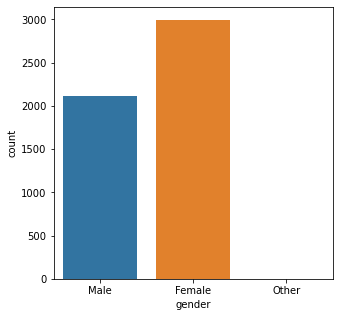

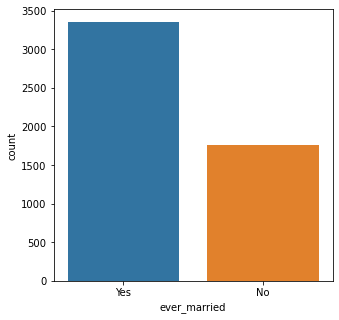

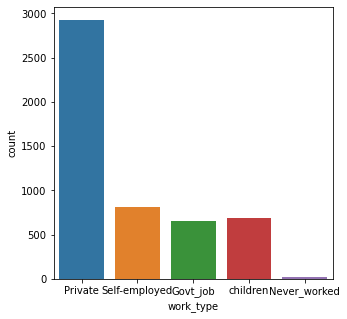

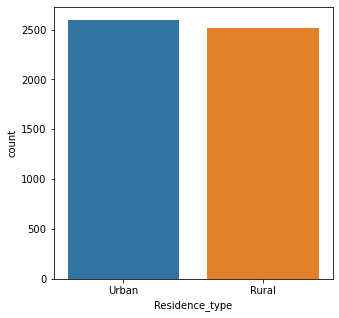

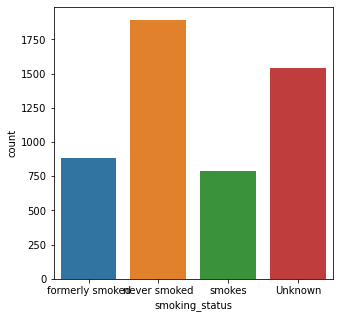

In [59]:
cat_var=['gender','ever_married','work_type','Residence_type','smoking_status']

def plot(list1,data):
    sns.countplot(data[list1])

for i in cat_var:
    plt.figure(figsize=(5,5))
    plot(i,ds)

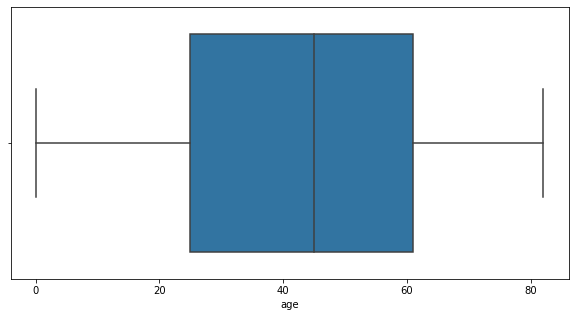

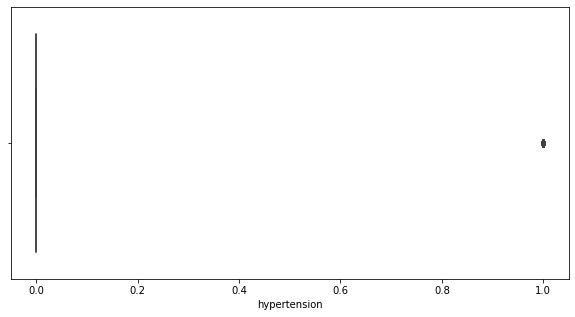

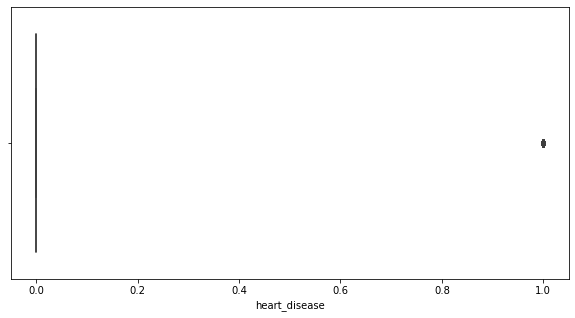

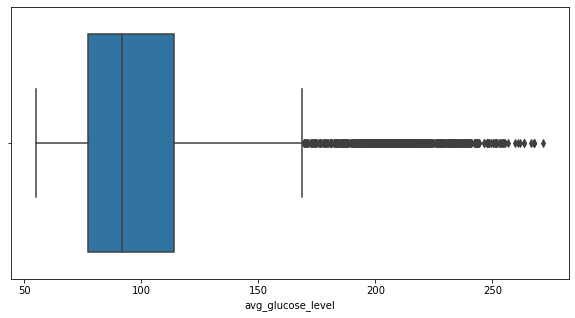

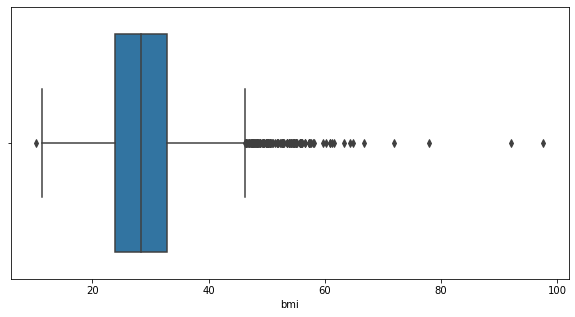

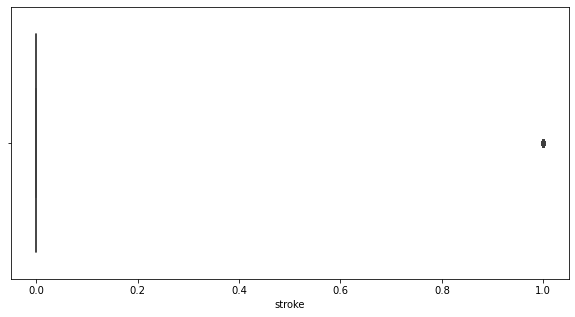

In [98]:
Numeric_var=ds.select_dtypes(exclude ='object') 
Numeric_var.head()
def plot(list1,data):
    sns.boxplot(data[list1])
for i in Numeric_var:
    plt.figure(figsize=(10,5))
    plot(i,ds)

In [100]:
def remove_outliers(col,df):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print(IQR)
    # calculate the outlier cutoff
    cut_off = IQR * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    df[col]=np.where(df[col]>lower)

for i in Numeric_var:
    remove_outliers(i,ds)

36.0
0.0
0.0
36.84500000000001
8.999999999999996
0.0
